In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('/content/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [17]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [18]:
df.shape

(1201, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [20]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [21]:
import datetime
datetime.datetime.now().year

2022

In [22]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [23]:
df.drop("YearBuilt",axis=1,inplace=True)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,19
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,46


#### Category Embedding

In [25]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]#To work with Embedding Layer
out_feature="SalePrice"

In [27]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [28]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()#It allocate index for unique values
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0])

In [29]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [30]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,19
1,0,3,80.0,9600,1,3,1262,0,181500,46
2,5,3,68.0,11250,1,0,920,866,223500,21
3,6,3,60.0,9550,1,0,961,756,140000,107
4,5,3,84.0,14260,1,0,1145,1053,250000,22
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,23
1456,0,3,85.0,13175,1,3,2073,0,210000,44
1457,6,3,66.0,9042,1,3,1188,1152,266500,81
1458,0,3,68.0,9717,1,3,1078,0,142125,72


In [32]:
### Stacking and Converting Into Tensors cat_features
import numpy as np
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features    #It sets as an array       

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [33]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)##Categorical features should be converted to INTEGER
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [34]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [35]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [36]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)##It coverts as numpy array
cont_values=torch.tensor(cont_values,dtype=torch.float)##It coverts as tensor array
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [37]:
cont_values.dtype

torch.float32

In [38]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)##Reshape gives 1 dimension array
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [40]:
df.shape,cat_features.shape,cont_values.shape,y.shape

((1201, 10),
 torch.Size([1201, 4]),
 torch.Size([1201, 5]),
 torch.Size([1201, 1]))

In [41]:
len(df['MSSubClass'].unique())

15

#### Embedding Size For Categorical columns
###### Embedding only for Categorical features

In [43]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [44]:
### Thumbs rule output set based on x, min(50, (x + 1) // 2)
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]##It should be not more than 50 layers
embedding_dim ## (15 inpts  and 8 output )

[(15, 8), (5, 3), (2, 1), (4, 2)]

#### Need to convert categorical feature to vectors(numbers)

In [46]:
import torch
import torch.nn as nn #Neural network
import torch.nn.functional as F #Activation fuctions inside into this library
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [47]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [48]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [49]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [50]:
embedding_val##Coverts to vectors

[tensor([[-0.5109,  0.3827, -0.2894,  ..., -0.0233,  0.1017,  1.3739],
         [ 0.1619,  1.3816, -0.3771,  ..., -0.4555, -0.4476,  0.4657],
         [-0.5109,  0.3827, -0.2894,  ..., -0.0233,  0.1017,  1.3739],
         ...,
         [-0.5520,  0.1628,  1.5052,  ..., -0.6503,  1.8582, -0.5158],
         [ 0.1619,  1.3816, -0.3771,  ..., -0.4555, -0.4476,  0.4657],
         [ 0.1619,  1.3816, -0.3771,  ..., -0.4555, -0.4476,  0.4657]],
        grad_fn=<EmbeddingBackward0>), tensor([[ 0.5079, -1.9139,  0.6757],
         [ 0.5079, -1.9139,  0.6757],
         [ 0.5079, -1.9139,  0.6757],
         ...,
         [ 0.5079, -1.9139,  0.6757],
         [ 0.5079, -1.9139,  0.6757],
         [ 0.5079, -1.9139,  0.6757]], grad_fn=<EmbeddingBackward0>), tensor([[1.2661],
         [1.2661],
         [1.2661],
         ...,
         [1.2661],
         [1.2661],
         [1.2661]], grad_fn=<EmbeddingBackward0>), tensor([[-1.1272,  0.2234],
         [-1.1272,  0.2234],
         [-0.3931, -0.1434],
  

In [51]:
## embedding_val is not a proper order so let's change in proper order or array
R = torch.cat(embedding_val, 1)
R

tensor([[-0.5109,  0.3827, -0.2894,  ...,  1.2661, -1.1272,  0.2234],
        [ 0.1619,  1.3816, -0.3771,  ...,  1.2661, -1.1272,  0.2234],
        [-0.5109,  0.3827, -0.2894,  ...,  1.2661, -0.3931, -0.1434],
        ...,
        [-0.5520,  0.1628,  1.5052,  ...,  1.2661, -1.1272,  0.2234],
        [ 0.1619,  1.3816, -0.3771,  ...,  1.2661, -1.1272,  0.2234],
        [ 0.1619,  1.3816, -0.3771,  ...,  1.2661, -1.1272,  0.2234]],
       grad_fn=<CatBackward0>)

In [52]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [53]:
final_embed=droput(R)
final_embed

tensor([[-0.8515,  0.0000, -0.0000,  ...,  0.0000, -0.0000,  0.3723],
        [ 0.2699,  0.0000, -0.6286,  ...,  0.0000, -0.0000,  0.0000],
        [-0.0000,  0.0000, -0.0000,  ...,  2.1102, -0.0000, -0.2389],
        ...,
        [-0.0000,  0.2713,  0.0000,  ...,  2.1102, -0.0000,  0.0000],
        [ 0.0000,  2.3026, -0.0000,  ...,  2.1102, -0.0000,  0.3723],
        [ 0.0000,  0.0000, -0.0000,  ...,  0.0000, -1.8787,  0.0000]],
       grad_fn=<MulBackward0>)

In [54]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])#Embedding layer
        self.emb_drop = nn.Dropout(p)#Droput 
        self.bn_cont = nn.BatchNorm1d(n_cont)#Batch normalization
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [55]:
len(cont_features)

5

In [56]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [57]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Define Loss And Optimizer

In [58]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [60]:
df.shape

(1201, 10)

In [61]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    19.],
        [   80.,  9600.,  1262.,     0.,    46.],
        [   68., 11250.,   920.,   866.,    21.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    81.],
        [   68.,  9717.,  1078.,     0.,    72.],
        [   75.,  9937.,  1256.,     0.,    57.]])

In [62]:
cont_values.shape

torch.Size([1201, 5])

In [63]:
batch_size=1200 #Total data rows
int(batch_size*0.15)

180

In [64]:
batch_size=1200 #Total data rows
test_size=int(batch_size*0.15)#Test data proportion
train_categorical=cat_features[:batch_size-test_size]##train categorical data
test_categorical=cat_features[batch_size-test_size:batch_size]##test categorical data
train_cont=cont_values[:batch_size-test_size]##train continues data
test_cont=cont_values[batch_size-test_size:batch_size]##test continues data
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [65]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [66]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.46875
Epoch number: 21 and the loss : 200489.140625
Epoch number: 31 and the loss : 200482.640625
Epoch number: 41 and the loss : 200473.25
Epoch number: 51 and the loss : 200461.375
Epoch number: 61 and the loss : 200446.4375
Epoch number: 71 and the loss : 200429.421875
Epoch number: 81 and the loss : 200407.953125
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.21875
Epoch number: 111 and the loss : 200322.0625
Epoch number: 121 and the loss : 200291.46875
Epoch number: 131 and the loss : 200252.109375
Epoch number: 141 and the loss : 200206.59375
Epoch number: 151 and the loss : 200162.046875
Epoch number: 161 and the loss : 200112.09375
Epoch number: 171 and the loss : 200058.890625
Epoch number: 181 and the loss : 200006.34375
Epoch number: 191 and the loss : 199946.953125
Epoch number: 201 and the loss : 199881.359375
Epoch number: 211 and the loss : 199815.26562

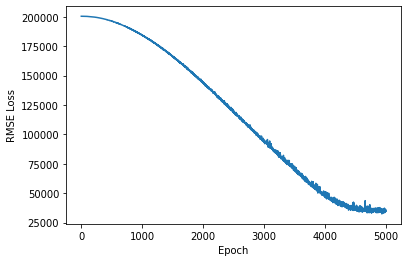

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
fi_los = [fl.item() for fl in final_losses ]
plt.plot(range(epochs), fi_los)
plt.ylabel('RMSE Loss')
plt.xlabel('Epoch');

In [68]:
### Losses Decreasing.....

In [69]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 40952.984375


In [71]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])
data_verify

,Test
0,130000.0
1,138887.0
2,175500.0
3,195000.0
4,142500.0
5,265900.0
6,224900.0
7,248328.0
8,170000.0
9,465000.0


In [72]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,143871.421875
1,235996.218750
2,137945.625000
3,230278.875000
4,213060.921875
5,210819.906250
6,158674.937500
7,304395.406250
8,143426.203125
9,356623.843750


In [73]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,143871.421875,-13871.421875
1,138887.0,235996.218750,-97109.218750
2,175500.0,137945.625000,37554.375000
3,195000.0,230278.875000,-35278.875000
4,142500.0,213060.921875,-70560.921875


In [74]:
#### Save the model
torch.save(model,'HousePricePredictor.pt')

In [77]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [78]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [79]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [80]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)